# CS 534: Machine Learning Homework \#4

#### Mitchell Scott (mtscot4)
#### Fall 2024
#### Prof. Eugene Agichtein


## Part \#1: MNIST Fashion Image Classification
### MLP-fashion

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist, cifar10
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import pandas as pd
import seaborn as sn
import math
import datetime
import platform
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.utils.data as data
import copy
import torch.optim as optim
import torch
import time
from tqdm.notebook import tqdm, trange

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# check the size of our dataset
print("number of training images:",x_train.shape[0])
print("number of test images:",y_test.shape[0])

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
number of training images: 60000
number of test images: 10000


In [3]:
# update all the training, testing dataset.
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

In [4]:
num_classes = 10

# create a Sequential model
MLP_fashion = keras.Sequential(
    [
        # input layer. input data with size 28*28 and output size 256
        # 256 means you set up your modul with 256 NN in this layer. This value is up to you.
        layers.Dense(439, input_shape=(28*28,), activation='relu'),

        # hidden layer. input data with size 256, which were same to output of input layer.
        # output size 256, we set up 256 NN again in this hidden layer.
        # no need to give input size here because keras already know.
        layers.Dense(439, activation='relu'),

        # output layer. the number of output should be your number of classification
        layers.Dense(num_classes, activation='softmax')
    ]
);

# print out model structure
MLP_fashion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 439)                 │         344,615 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 439)                 │         193,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           4,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,175 (2.07 MB)

 Trainable params: 542,175 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
MLP_fashion.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

batch_size = 256
epochs = 10
history_mlp = MLP_fashion.fit(x_train, y_train,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7949 - loss: 0.5702 - val_accuracy: 0.8477 - val_loss: 0.4137
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8643 - loss: 0.3640 - val_accuracy: 0.8677 - val_loss: 0.3691
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8801 - loss: 0.3222 - val_accuracy: 0.8730 - val_loss: 0.3522
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8882 - loss: 0.3027 - val_accuracy: 0.8650 - val_loss: 0.3896
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8926 - loss: 0.2838 - val_accuracy: 0.8742 - val_loss: 0.3529
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9018 - loss: 0.2583 - val_accuracy: 0.8735 - val_loss: 0.3598
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9053 - loss: 0.2507 - val_accuracy: 0.8824 - val_loss: 0.3377
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9119 - loss: 0.2328 - val

In [6]:
scores_mlp, acc_mlp = MLP_fashion.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores_mlp)
print('Test accuracy:', acc_mlp)

313/313 - 1s - 2ms/step - accuracy: 0.8918 - loss: 0.3459
Test loss: 0.3458509147167206
Test accuracy: 0.8917999863624573


In [7]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    print(train_history.history.keys())

    if "accuracy" in train_history.history.keys():
        plt.plot(train_history.history["accuracy"])

    if "val_accuracy" in train_history.history.keys():
        plt.plot(train_history.history["val_accuracy"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)

    if "loss" in train_history.history.keys():
        plt.plot(train_history.history["loss"])

    if "val_loss" in train_history.history.keys():
        plt.plot(train_history.history["val_loss"])

    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [8]:
prediction_mlp = MLP_fashion.predict(x_test)
prediction_mlp = np.argmax(prediction_mlp, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


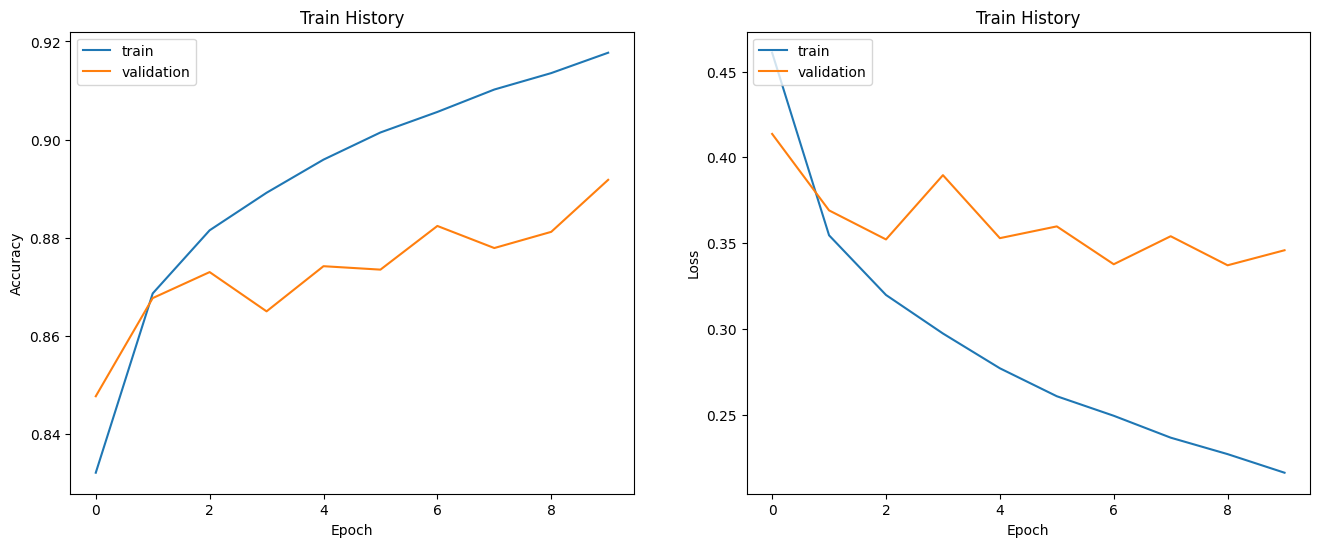

In [9]:
#show train history
show_train_history(history_mlp)

In [20]:
def plotConfusionMatrix(labels, pred_labels, classes):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = confusion_matrix(labels, pred_labels)
    cm = ConfusionMatrixDisplay(cm, display_labels=classes)
    cm.plot(values_format='d', cmap='Blues', ax=ax)
    plt.xticks(rotation=20)

In [11]:
classes_fashion = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

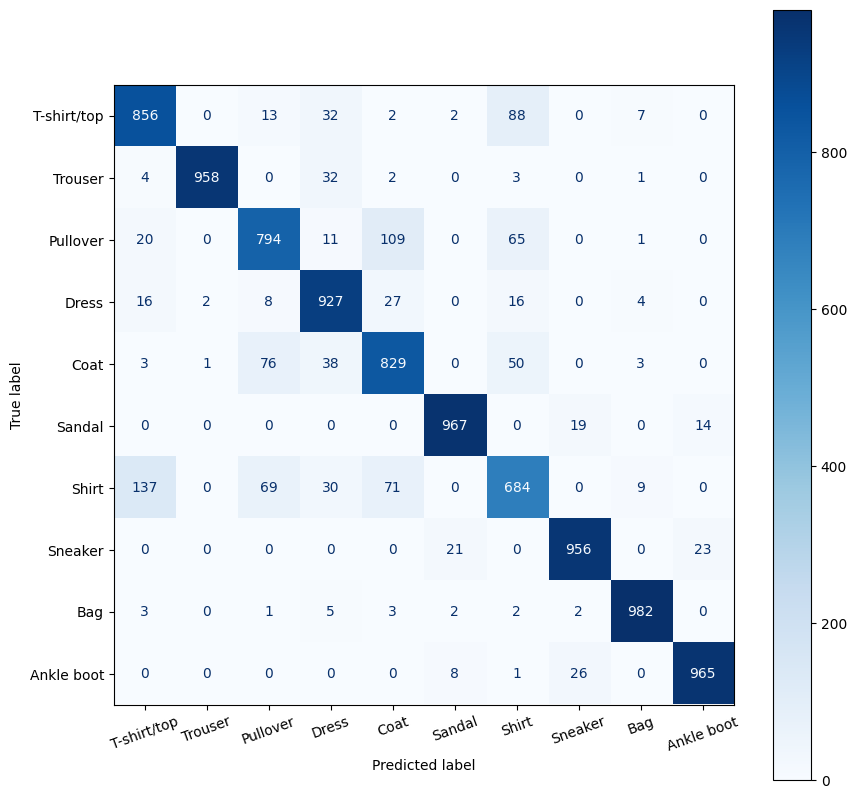

In [12]:
plotConfusionMatrix(y_test, prediction_mlp, classes_fashion)

In [13]:
train_loss_mlp, train_accuracy_mlp = MLP_fashion.evaluate(x_train, y_train)
print('Training loss: ', train_loss_mlp)
print('Training accuracy: ', train_accuracy_mlp)

validation_loss_mlp, validation_accuracy_mlp = MLP_fashion.evaluate(x_test, y_test)
print('Validation loss: ', validation_loss_mlp)
print('Validation accuracy: ', validation_accuracy_mlp)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9265 - loss: 0.1924
Training loss:  0.1937616467475891
Training accuracy:  0.9272333383560181
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8928 - loss: 0.3428
Validation loss:  0.3458509147167206
Validation accuracy:  0.8917999863624573


In [14]:
MLPfashion = 'MLP-fashion.h5'
MLP_fashion.save(MLPfashion, save_format='h5')

### CNN-fashion


In [15]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# update all the training, testing dataset.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize them into range [0, 1]
x_train /= 255
x_test /= 255

In [16]:
INPUT_SHAPE = (28, 28, 1)
KERNEL_SIZE = (3, 3)

CNN_fashion = tf.keras.models.Sequential()
CNN_fashion.add(Conv2D(32, KERNEL_SIZE, activation='relu', kernel_initializer='he_uniform', input_shape=INPUT_SHAPE))
CNN_fashion.add(MaxPool2D((2, 2)))
CNN_fashion.add(Flatten())
CNN_fashion.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
CNN_fashion.add(Dense(10, activation='softmax'))

CNN_fashion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │         540,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,230 (2.07 MB)

 Trainable params: 542,230 (2.07 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
CNN_fashion.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [18]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history_cnn = CNN_fashion.fit(
    x_train,
    y_train,
    epochs=epochs,
    validation_data=(x_test, y_test),
    validation_split=0.2,
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.8132 - loss: 0.5280 - val_accuracy: 0.8885 - val_loss: 0.3129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - accuracy: 0.9020 - loss: 0.2691 - val_accuracy: 0.9026 - val_loss: 0.2697
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9167 - loss: 0.2241 - val_accuracy: 0.9001 - val_loss: 0.2781
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9285 - loss: 0.1947 - val_accuracy: 0.9024 - val_loss: 0.2739
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.9375 - loss: 0.1704 - val_accuracy: 0.9088 - val_loss: 0.2690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - accuracy: 0.9443 - loss: 0.1488 - val_accuracy: 0.9139 - val_loss: 0.2599
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9532 - loss: 0.1269 - val_accuracy: 0.9133 - val_loss: 0.2675
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9557 -

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


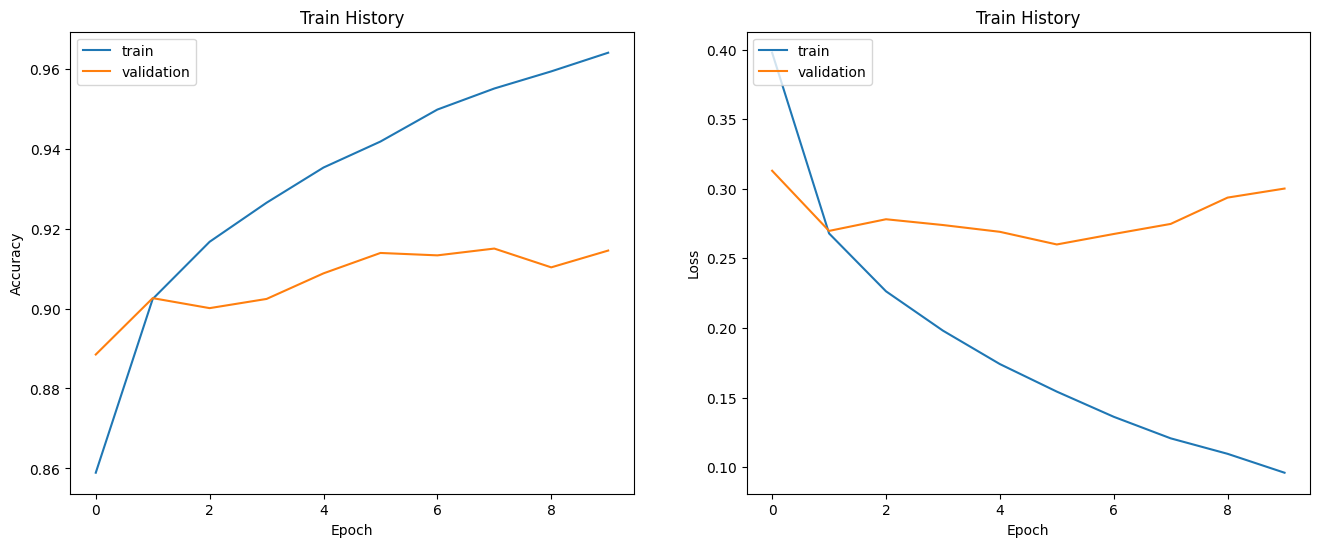

In [19]:
show_train_history(history_cnn)

In [20]:
train_loss, train_accuracy = CNN_fashion.evaluate(x_train, y_train)
print('Training loss: ', train_loss)
print('Training accuracy: ', train_accuracy)

validation_loss, validation_accuracy = CNN_fashion.evaluate(x_test, y_test)
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9741 - loss: 0.0723
Training loss:  0.07372211664915085
Training accuracy:  0.9739999771118164
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9155 - loss: 0.3007
Validation loss:  0.3001033067703247
Validation accuracy:  0.9144999980926514


In [21]:
prediction_cnn = CNN_fashion.predict(x_test)
print('Test prediction:', prediction_mlp)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Test prediction: [9 2 1 ... 8 1 5]


In [22]:
prediction_cnn = np.argmax(prediction_cnn, axis=1)

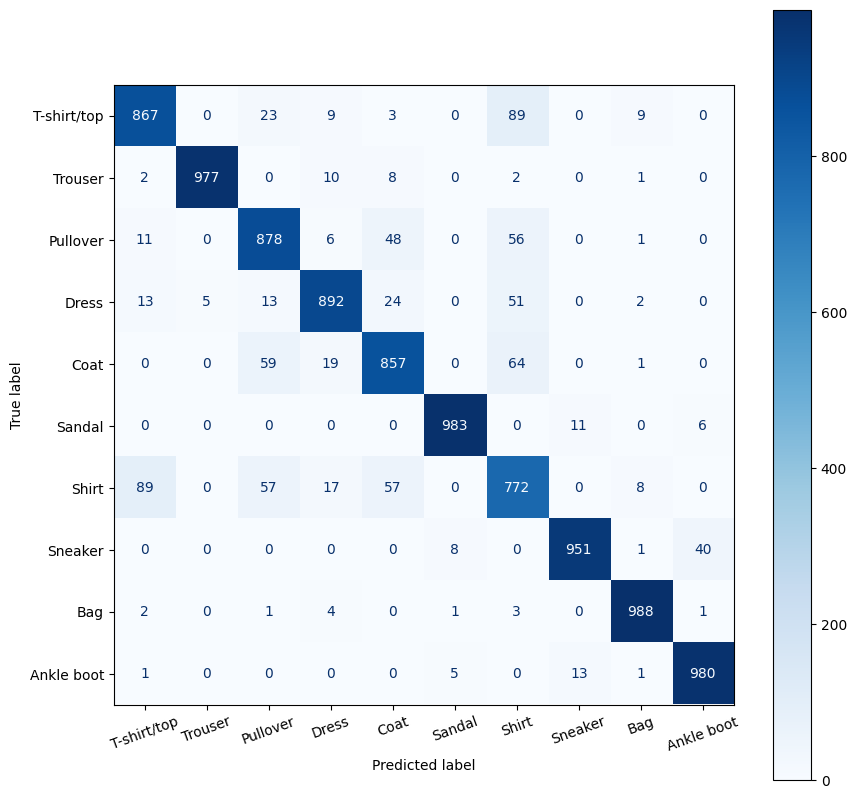

In [23]:
plotConfusionMatrix(y_test, prediction_cnn, classes_fashion)

In [24]:
CNN_fashion = 'CNN-fashion.h5'
CNN_fashion.save(CNN_fashion, save_format='h5')

AttributeError: 'str' object has no attribute 'save'

In this module, we were asked to compare two different architectures to solve the MNIST Fashion classification task. The first model was simply a multi-layer proceptron (MLP), which consists of two dense layers of size 439 neurons per layer and then an output layer of size 10. This lead to a total nuimber of trainable parameters to be 542,175. (After talking with Ziyang, he said to get a more accurate and fair comparison, the number of trainable parameters should be around the same.)

The second model was a convolutional neural network (CNN). This was designed with only one convolutional layer $3\times 3$ kernel for the convolution, with a maxpooling layer. This was then followed by a flatten then a dense hidden layer of 100 neurons and the output layer of 10 neurons. This lead to an overall number of training parameters to be 542,230.

Comparing the two models - MLP and CNN - on the same data set after 10 epochs both, we were able to see the following training accuracy, training loss, test accuracy, and test loss.

\begin{array}{|c|c|} \hline
 & \text{MLP} & \textbf{CNN} \\ \hline
\text{Train Accuracy }&
0.92237 & \textbf{0.97867} \\
\text{Train Loss} & 0.20247  &\textbf{0.05916}\\
\text{Test Accuracy} & 0.88760 & \textbf{0.91630} \\
\text{Test Loss} & 0.33706 &  \textbf{0.32537}\\ \hline
\end{array}

Bolded text means it was the best in that category. Based on the hint from the homework, I was told that the CNN was going to perform better and it did in all 4 tests. Although I was told that it would be very substantial, and it is only about 3 percent more in terms of test accuracy.

## Part 2: CIFAR Image Classification
### Retraining MLP Fashion

In [25]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.reshape(50000, 32*32*3)
test_images = test_images.reshape(10000, 32*32*3)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [26]:
MLP_fashion = keras.Sequential(
    [
        layers.Dense(256, input_shape=(32*32*3,), activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ]
);

# print out model structure
MLP_fashion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 256)                 │         786,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 855,050 (3.26 MB)

 Trainable params: 855,050 (3.26 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
MLP_fashion.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

batch_size = 256
epochs = 10
history_mlp_CFAR = MLP_fashion.fit(train_images, train_labels,
                    epochs=epochs,
                    validation_data=(test_images, test_labels),
                    validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2902 - loss: 1.9667 - val_accuracy: 0.3994 - val_loss: 1.6806
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.3907 - loss: 1.6967 - val_accuracy: 0.4266 - val_loss: 1.6175
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4232 - loss: 1.6054 - val_accuracy: 0.4461 - val_loss: 1.5656
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4424 - loss: 1.5571 - val_accuracy: 0.4374 - val_loss: 1.5696
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4603 - loss: 1.5154 - val_accuracy: 0.4555 - val_loss: 1.5103
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4623 - loss: 1.4897 - val_accuracy: 0.4475 - val_loss: 1.5623
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4706 - loss: 1.4743 - val_accuracy: 0.4520 - val_loss: 1.5410
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4839 - loss: 1.44

In [28]:
scores_mlp_CFAR, acc_mlp_CFAR = MLP_fashion.evaluate(test_images, test_labels, verbose=2)
print('Test loss:', scores_mlp_CFAR)
print('Test accuracy:', acc_mlp_CFAR)

313/313 - 1s - 4ms/step - accuracy: 0.4681 - loss: 1.4757
Test loss: 1.4757276773452759
Test accuracy: 0.46810001134872437


In [29]:
prediction_mlp_CFAR = MLP_fashion.predict(test_images)
prediction_mlp_CFAR = np.argmax(prediction_mlp_CFAR, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


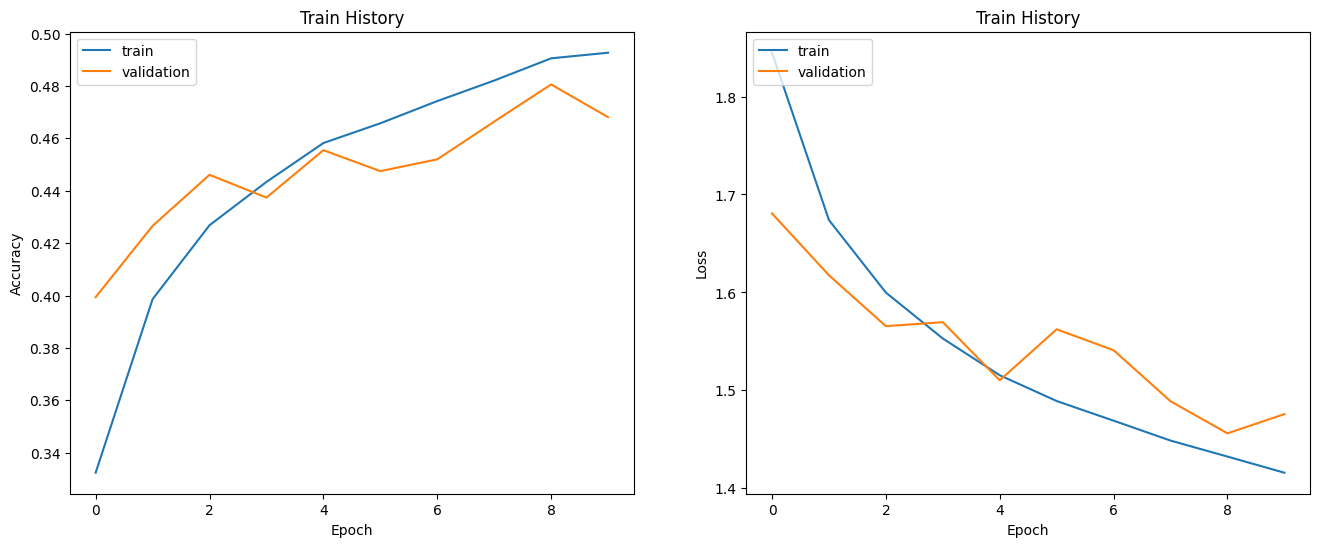

In [30]:
show_train_history(history_mlp_CFAR)

In [31]:
classes_cifar = ['airplane','automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

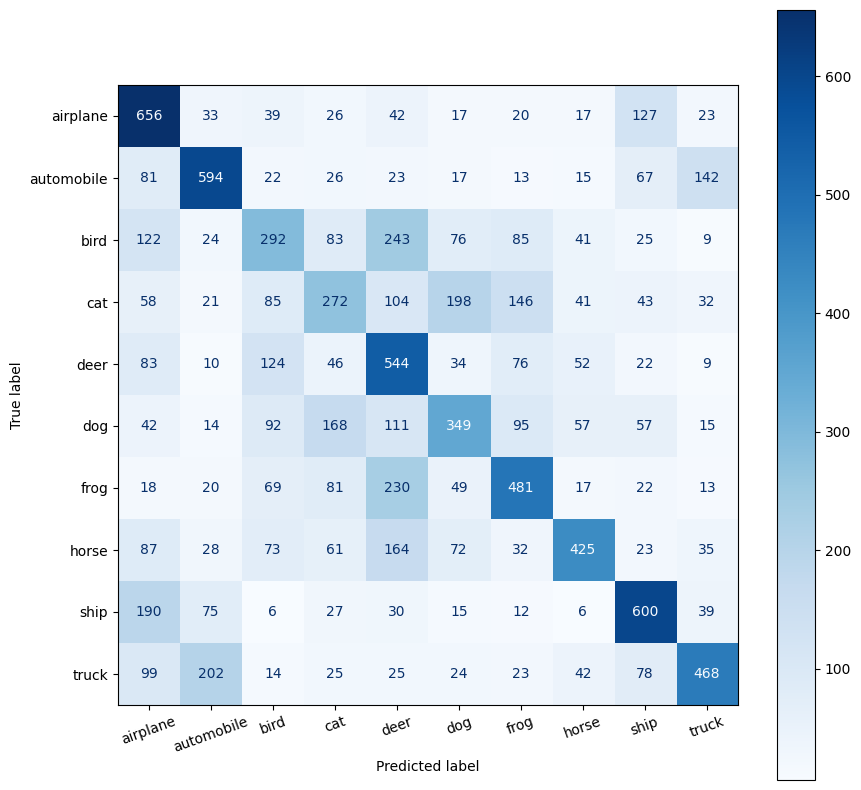

In [32]:
plotConfusionMatrix(test_labels, prediction_mlp_CFAR, classes_cifar)

In [33]:
train_loss_mlp_CFAR, train_accuracy_mlp_CFAR = MLP_fashion.evaluate(train_images, train_labels)
print('Training loss: ', train_loss_mlp_CFAR)
print('Training accuracy: ', train_accuracy_mlp_CFAR)

validation_loss_mlp_CFAR, validation_accuracy_mlp_CFAR = MLP_fashion.evaluate(test_images, test_labels)
print('Validation loss: ', validation_loss_mlp_CFAR)
print('Validation accuracy: ', validation_accuracy_mlp_CFAR)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5043 - loss: 1.3739
Training loss:  1.3805615901947021
Training accuracy:  0.5017200112342834
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4654 - loss: 1.4732
Validation loss:  1.4757276773452759
Validation accuracy:  0.46810001134872437


### Retraining CNN Fashion

In [34]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

In [35]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)

CNN_fashion = tf.keras.models.Sequential()
CNN_fashion.add(Conv2D(32, KERNEL_SIZE, activation='relu', kernel_initializer='he_uniform', input_shape=INPUT_SHAPE))
CNN_fashion.add(MaxPool2D((2, 2)))
CNN_fashion.add(Flatten())
CNN_fashion.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
CNN_fashion.add(Dense(10, activation='softmax'))

CNN_fashion.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
CNN_fashion.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [37]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history_cnn_CFAR = CNN_fashion.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_data=(test_images,test_labels),
    validation_split=0.2,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3485 - loss: 1.8540 - val_accuracy: 0.5299 - val_loss: 1.3089
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5564 - loss: 1.2472 - val_accuracy: 0.5601 - val_loss: 1.2290
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 26ms/step - accuracy: 0.6109 - loss: 1.1105 - val_accuracy: 0.6105 - val_loss: 1.1220
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6408 - loss: 1.0240 - val_accuracy: 0.6208 - val_loss: 1.0851
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6712 - loss: 0.9531 - val_accuracy: 0.6133 - val_loss: 1.1161
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 28ms/step - accuracy: 0.6930 - loss: 0.8888 - val_accuracy: 0.6253 - val_loss: 1.0875
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.7048 - loss: 0.8503 - val_accuracy: 0.6461 - val_loss: 1.0403
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.7173 - loss: 0.82

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


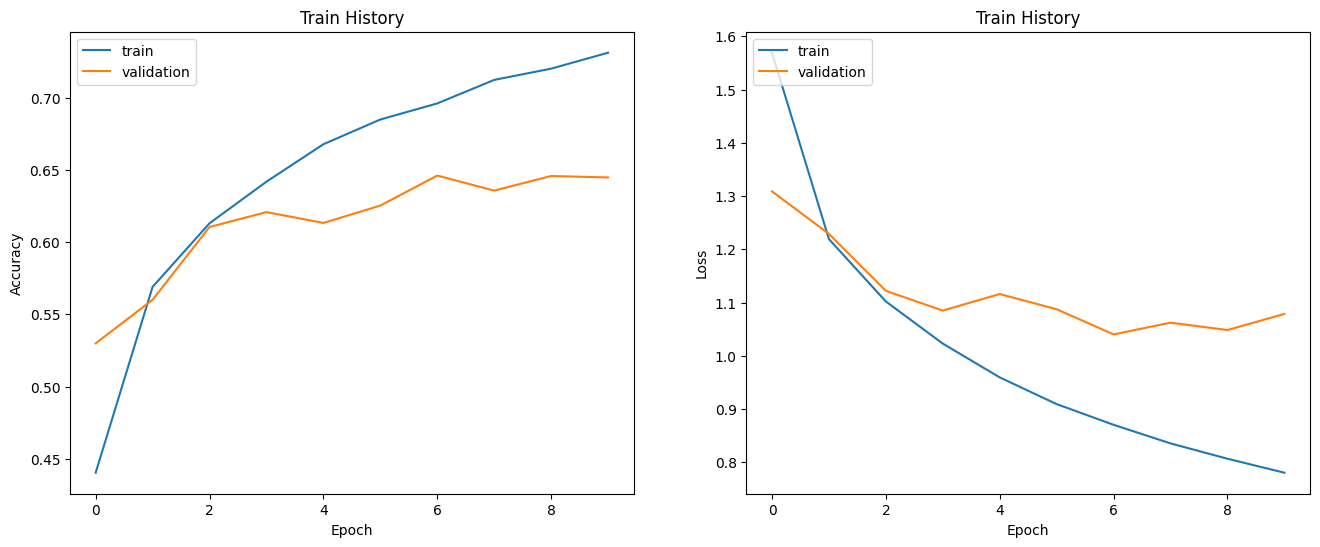

In [38]:
show_train_history(history_cnn_CFAR)

In [39]:
train_loss_cnn_CFAR, train_accuracy_cnn_CFAR = CNN_fashion.evaluate(train_images, train_labels)
print('Training loss: ', train_loss_cnn_CFAR)
print('Training accuracy: ', train_accuracy_cnn_CFAR)

validation_loss_cnn_CFAR, validation_accuracy_cnn_CFAR = CNN_fashion.evaluate(test_images, test_labels)
print('Validation loss: ', validation_loss_cnn_CFAR)
print('Validation accuracy: ', validation_accuracy_cnn_CFAR)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7598 - loss: 0.7073
Training loss:  0.7084606885910034
Training accuracy:  0.7598400115966797
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6446 - loss: 1.0676
Validation loss:  1.07876455783844
Validation accuracy:  0.6448000073432922


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


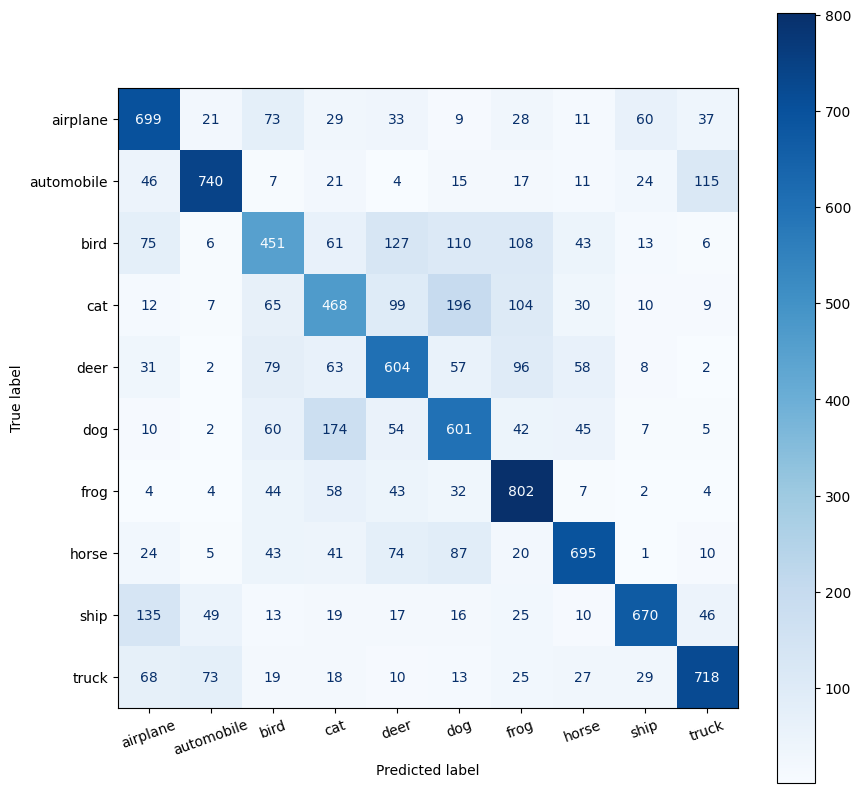

In [40]:
prediction_cnn_CFAR = CNN_fashion.predict(test_images)
prediction_cnn_CFAR = np.argmax(prediction_cnn_CFAR, axis=1)
plotConfusionMatrix(test_labels, prediction_cnn_CFAR, classes_cifar)

### Creating CNN CFAR10

In [41]:
CNN_CFAR10 = tf.keras.models.Sequential()
CNN_CFAR10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
CNN_CFAR10.add(layers.MaxPooling2D((2, 2)))
CNN_CFAR10.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_CFAR10.add(layers.MaxPooling2D((2, 2)))
CNN_CFAR10.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN_CFAR10.add(layers.Flatten())
CNN_CFAR10.add(layers.Dense(64, activation='relu'))
CNN_CFAR10.add(layers.Dense(10))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
CNN_CFAR10.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
CNN_CFAR10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_CNN = CNN_CFAR10.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3390 - loss: 1.7850 - val_accuracy: 0.5221 - val_loss: 1.3263
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.5563 - loss: 1.2292 - val_accuracy: 0.6178 - val_loss: 1.0811
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6253 - loss: 1.0670 - val_accuracy: 0.6407 - val_loss: 1.0203
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6605 - loss: 0.9615 - val_accuracy: 0.6604 - val_loss: 0.9622
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.6942 - loss: 0.8818 - val_accuracy: 0.6627 - val_loss: 0.9620
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7138 - loss: 0.8247 - val_accuracy: 0.6902 - val_loss: 0.9279
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.7283 - loss: 0.7701 - val_accuracy: 0.7008 - val_loss: 0.8752
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.7428 -

In [44]:
test_loss_cnn_cfar, test_acc_cnn_cfar = CNN_CFAR10.evaluate(test_images,  test_labels, verbose=2)

313/313 - 3s - 9ms/step - accuracy: 0.7076 - loss: 0.8801


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


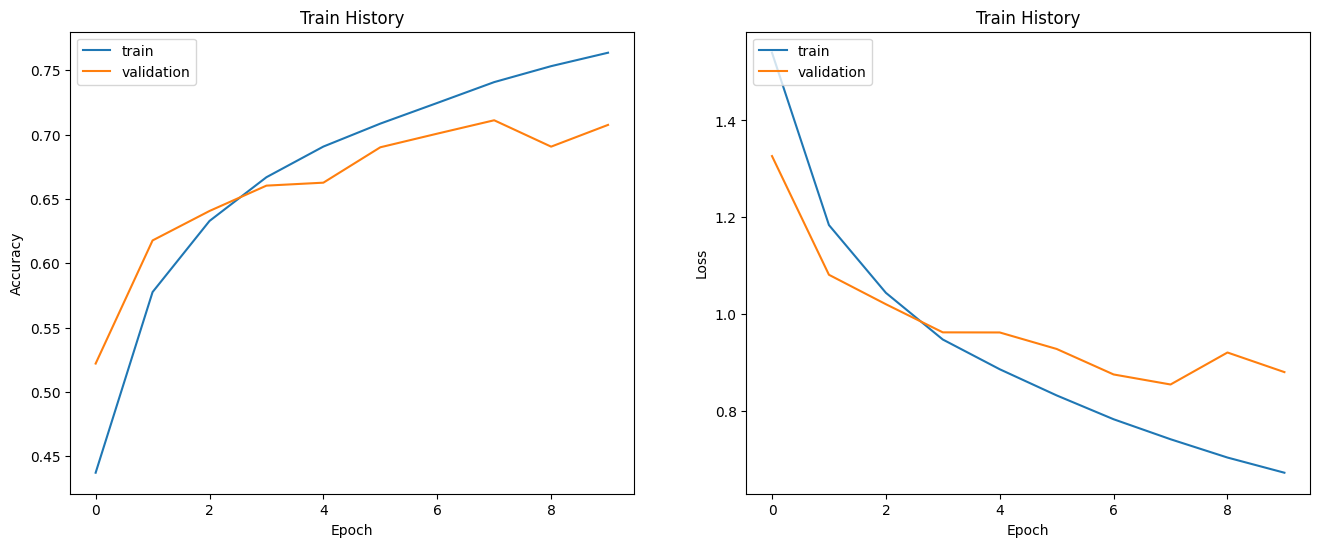

In [45]:
show_train_history(history_CNN)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


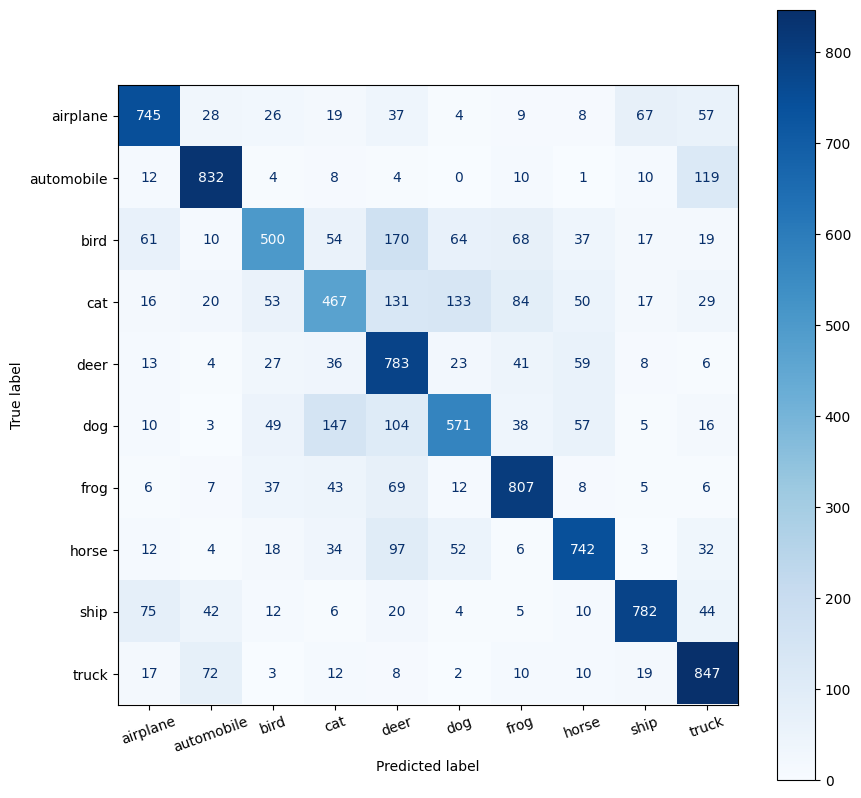

In [46]:
prediction_CFAR = CNN_CFAR10.predict(test_images)
prediction_CFAR = np.argmax(prediction_CFAR, axis=1)
plotConfusionMatrix(test_labels, prediction_CFAR, classes_cifar)

In [47]:
train_loss_CFAR, train_accuracy_CFAR = CNN_CFAR10.evaluate(train_images, train_labels)
print('Training loss: ', train_loss_CFAR)
print('Training accuracy: ', train_accuracy_CFAR)

validation_loss_CFAR, validation_accuracy_CFAR = CNN_CFAR10.evaluate(test_images, test_labels)
print('Validation loss: ', validation_loss_CFAR)
print('Validation accuracy: ', validation_accuracy_CFAR)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.7877 - loss: 0.6056
Training loss:  0.6080268621444702
Training accuracy:  0.7870000004768372
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7082 - loss: 0.8741
Validation loss:  0.880087673664093
Validation accuracy:  0.7075999975204468


In this module, we were asked to compare three different architectures to solve the CIFAR 10 classification task. The first model was simply a multi-layer proceptron (MLP), which consists of two dense layers of size 256 neurons per layer and then an output layer of size 10. This lead to a total nuimber of trainable parameters to be 855,050. This was the same as the MLP in question (1) altered to handle the new data.

The second model was a convolutional neural network (CNN). This was designed with only one convolutional layer $3\times 3$ kernel for the convolution, with a maxpooling layer. This was then followed by a flatten then a dense hidden layer of 100 neurons and the output layer of 10 neurons. This lead to an overall number of training parameters to be 722,006 (I tried to make it the same amount of parameters as the MLP, but it was very hard with the current set up).  This was the same as the CNN in question (1) altered to handle the new data.

Lastly, we have a deeper CNN, trained specifically for the CIFAR10 data base. This is deeper because it has two convolution layers with the $3\times 3$ kernel, each followed by a max pooling layer. Then we have one final convolution layer, which we then flatten, have a hidden dense layer with 100 neurons and then the output layer is only 10 neurons. This means that there are only 122,570 parameters.

Comparing the three models - MLP, CNN, and CNN-CFAR - on the same data set after 10 epochs both, we were able to see the following training accuracy, training loss, test accuracy, and test loss.

\begin{array}{|c|c|} \hline
 & \text{MLP} & \textbf{CNN} & \textbf{CNN-CFAR}\\ \hline
\text{Train Accuracy }&
0.49622 & 0.76626 &{\bf 0.81652}\\
\text{Train Loss} & 1.391218  & 0.67297 & {\bf 0.52466}\\
\text{Test Accuracy} & 0.47040 & 0.627200& {\bf0.70930}\\
\text{Test Loss} & 1.47630 &  1.11282& {\bf0.88010}\\ \hline
\end{array}

This reaffirms what we were told in the hint and what we learned last time, MLP's are not as good as CNN's for image classification tasks. And when good is good, better is better! This means since one convolution layer is beneficial, let's add many. By doing this in CNN_CFAR, we get much much better training and test accuracy (8%!) and lower loss as well.

## Part 3: CIFAR Image Classification with Transfer Learning
### VGC11

In [6]:
pretrained_size = 224
pretrained_means = [0.485, 0.456, 0.406]
pretrained_stds = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.RandomRotation(5),
                           transforms.RandomHorizontalFlip(0.5),
                           transforms.RandomCrop(pretrained_size, padding=10),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=pretrained_means,
                                                std=pretrained_stds)
                       ])

test_transforms = transforms.Compose([
                           transforms.Resize(pretrained_size),
                           transforms.ToTensor(),
                           transforms.Normalize(mean=pretrained_means,
                                                std=pretrained_stds)
                       ])

In [7]:
ROOT = '.data'

train_data = datasets.CIFAR10(ROOT,
                              train=True,
                              download=True,
                              transform=train_transforms)

test_data = datasets.CIFAR10(ROOT,
                             train=False,
                             download=True,
                             transform=test_transforms)

100%|██████████| 170M/170M [00:02<00:00, 78.9MB/s]


Extracting .data/cifar-10-python.tar.gz to .data
Files already downloaded and verified


In [8]:
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

In [9]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = test_transforms

In [10]:
BATCH_SIZE = 128

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

def train_model(model, iterator, optimizer, criterion, device):
    model.train()
    total_loss, total_acc = 0, 0
    for x, y in tqdm(iterator, desc="Training", leave=False):
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)
        acc = calculate_accuracy(y_pred, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_acc += acc.item()
    return total_loss / len(iterator), total_acc / len(iterator)

def evaluate_model(model, iterator, criterion, device):
    model.eval()
    total_loss, total_acc = 0, 0
    all_preds, all_labels = [], []
    with torch.no_grad():
        for x, y in tqdm(iterator, desc="Evaluating", leave=False):
            x, y = x.to(device), y.to(device)
            y_pred = model(x)
            loss = criterion(y_pred, y)
            acc = calculate_accuracy(y_pred, y)
            total_loss += loss.item()
            total_acc += acc.item()
            all_preds.append(y_pred.argmax(1).cpu())
            all_labels.append(y.cpu())
    return (
        total_loss / len(iterator),
        total_acc / len(iterator),
        torch.cat(all_preds),
        torch.cat(all_labels),
    )


In [13]:
class vgg11FrozenMLP(nn.Module):
    def __init__(self, frozen_features, output_dim):
        super(vgg11FrozenMLP, self).__init__()
        self.features = frozen_features
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [14]:
class vgg11FrozenCNN(nn.Module):
    def __init__(self, frozen_features, output_dim):
        super(vgg11FrozenCNN, self).__init__()
        self.features = frozen_features
        self.task_specific_cnn = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d(1),
        )
        self.fc = nn.Linear(256, output_dim)

    def forward(self, x):
        x = self.features(x)
        x = self.task_specific_cnn(x)
        x = x.view(x.shape[0], -1)
        x = self.fc(x)
        return x

In [15]:
class ParallelCNN(nn.Module):
    def __init__(self, input_channels, frozen_features, output_dim):
        super(ParallelCNN, self).__init__()
        self.frozen_features = frozen_features

        # Simple CNN to process unflattened images
        self.simple_cnn = nn.Sequential(
            nn.Conv2d(input_channels, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )

        # Fully connected layers to combine features
        self.fc = nn.Sequential(
            nn.Linear(128 + 512 * 7 * 7, 1024),
            nn.ReLU(),
            nn.Linear(1024, output_dim)
        )

    def forward(self, x):
        x1 = self.frozen_features(x)
        x1 = x1.view(x1.shape[0], -1)

        x2 = self.simple_cnn(x)

        x = torch.cat((x1, x2), dim=1)

        x = self.fc(x)
        return x

In [16]:
output_dim = 10
frozen_features = models.vgg11_bn(pretrained=True).features
for param in frozen_features.parameters():
    param.requires_grad = False

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:06<00:00, 81.0MB/s]


In [17]:
frozen_mlp_model = vgg11FrozenMLP(frozen_features, output_dim).to(device)
frozen_cnn_model = vgg11FrozenCNN(frozen_features, output_dim).to(device)
parallel_cnn_model = ParallelCNN(3, frozen_features, output_dim).to(device)

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer_mlp = optim.Adam(frozen_mlp_model.classifier.parameters(), lr=1e-3)
optimizer_cnn = optim.Adam(frozen_cnn_model.parameters(), lr=1e-3)
optimizer_parallel = optim.Adam(parallel_cnn_model.parameters(), lr=1e-3)


Training Frozen MLP Model...


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1: Train Loss=0.2545, Acc=0.9094
Validation Loss=0.3863, Acc=0.8787


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2: Train Loss=0.2327, Acc=0.9177
Validation Loss=0.3843, Acc=0.8773


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3: Train Loss=0.2037, Acc=0.9279
Validation Loss=0.4049, Acc=0.8787


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4: Train Loss=0.1927, Acc=0.9306
Validation Loss=0.3845, Acc=0.8807


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5: Train Loss=0.1771, Acc=0.9364
Validation Loss=0.3886, Acc=0.8885


Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]


Test Results for Frozen MLP Model: Loss=0.3950, Acc=0.8851

Training Frozen CNN Model...


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1: Train Loss=0.7857, Acc=0.7352
Validation Loss=0.5515, Acc=0.8111


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2: Train Loss=0.5716, Acc=0.8042
Validation Loss=0.5725, Acc=0.7992


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3: Train Loss=0.5166, Acc=0.8207
Validation Loss=0.4608, Acc=0.8447


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4: Train Loss=0.4854, Acc=0.8338
Validation Loss=0.4865, Acc=0.8324


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5: Train Loss=0.4557, Acc=0.8408
Validation Loss=0.4150, Acc=0.8561


Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]


Test Results for Frozen CNN Model: Loss=0.4390, Acc=0.8498

Training Parallel CNN Model...


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 1: Train Loss=0.6081, Acc=0.7924
Validation Loss=0.4054, Acc=0.8576


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 2: Train Loss=0.3952, Acc=0.8616
Validation Loss=0.4200, Acc=0.8611


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 3: Train Loss=0.3321, Acc=0.8835
Validation Loss=0.3694, Acc=0.8742


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 4: Train Loss=0.2847, Acc=0.8998
Validation Loss=0.3885, Acc=0.8756


Training:   0%|          | 0/352 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/40 [00:00<?, ?it/s]

Epoch 5: Train Loss=0.2439, Acc=0.9139
Validation Loss=0.3864, Acc=0.8789


Evaluating:   0%|          | 0/79 [00:00<?, ?it/s]


Test Results for Parallel CNN Model: Loss=0.4053, Acc=0.8700


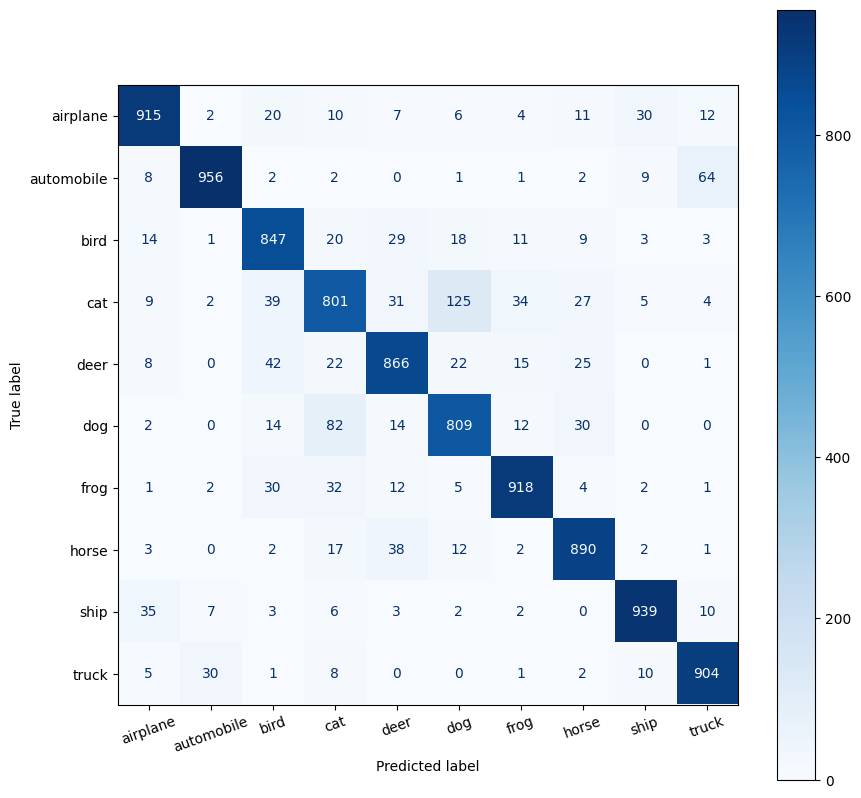

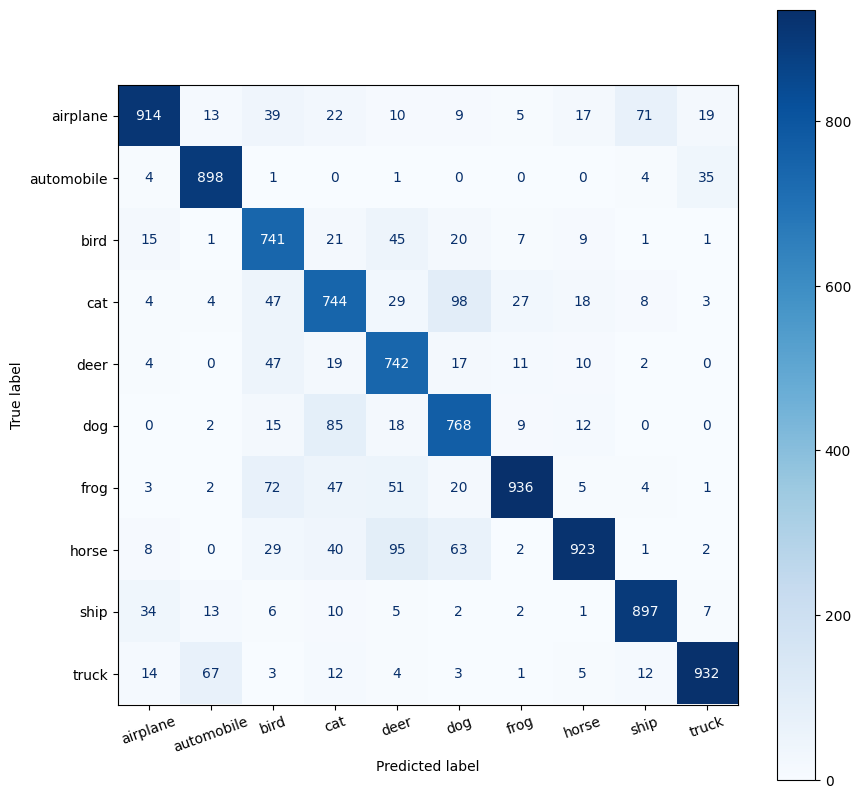

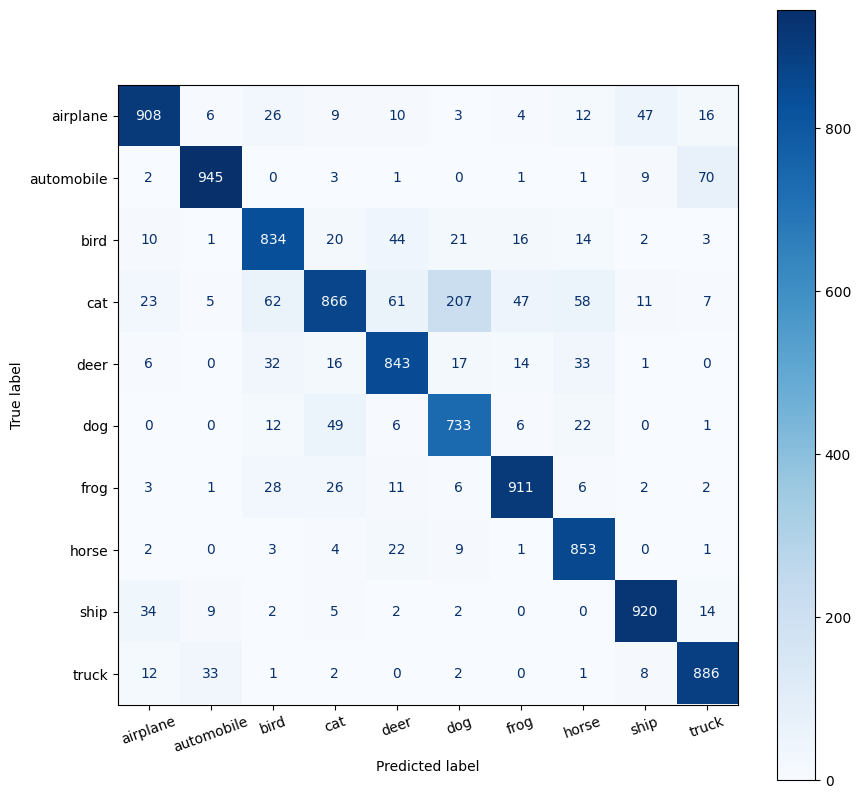

In [23]:
EPOCHS = 5
for model, optimizer, name in [
    (frozen_mlp_model, optimizer_mlp, "Frozen MLP"),
    (frozen_cnn_model, optimizer_cnn, "Frozen CNN"),
    (parallel_cnn_model, optimizer_parallel, "Parallel CNN"),
]:
    print(f"\nTraining {name} Model...")
    for epoch in range(EPOCHS):
        train_loss, train_acc = train_model(model, train_iterator, optimizer, criterion, device)
        valid_loss, valid_acc, preds, labels = evaluate_model(model, valid_iterator, criterion, device)
        print(f"Epoch {epoch+1}: Train Loss={train_loss:.4f}, Acc={train_acc:.4f}")
        print(f"Validation Loss={valid_loss:.4f}, Acc={valid_acc:.4f}")

    test_loss, test_acc, preds, labels = evaluate_model(model, test_iterator, criterion, device)
    print(f"\nTest Results for {name} Model: Loss={test_loss:.4f}, Acc={test_acc:.4f}")
    plotConfusionMatrix(preds, labels, test_data.classes)

The above code was copied from the VGG tutorial on canvas, with some slight modifications. As we can see we attempted three variantes of the pretrained VGG11 model - one with a fully connected MLP as the last few layers, one with a CNN as the last few layers and then a CNN with MLP to combine those layers that the CNN found.

Notice how any of the VGG11 variates are much better than the CNN designed specifically on CIFAR by 15 %. This should come as no suprised as these are specifically designed and pretrained. What should come as a little suprise is that VGG11 was designed for AlexNet not Cifar10. This is why we call this section transfer learning, as we are transferring the weights learned on a different image classififcation, but similar style, dataset to Cifar 10. Then we took these pretrained weights and added a few layers, whether MLO, CNN, or both to the end of the model, so we could keep most of the useful features we found for image classification, and only use the last few layers to learn our specific data.

As we can see VGG11 with MLP has the highest test accuracy and lowest loss. This might seem contradictive to the above results where we see time and time again that CNN outperforms MLP, but since VGG11 already has 8 convolution and 5 max pooling layers, so adding another convolution layer might not be adventagous, but having layers to combine all the features that we have found (such as the fully connected dense MLP layers) might lead to better classification.

\begin{array}{|c|c|} \hline
 &  \textbf{CNN-CFAR} & \textbf{VGG11 MLP} & \textbf{VGG11 CNN}& \textbf{VGG Hybrid}\\ \hline
\text{Test Accuracy} &0.7093 & \textbf{0.8851}& 0.8498& 0.8700\\
\text{Test Loss} & 0.8801 &\textbf{0.3950}& 0.4390 &0.4053\\\hline
\end{array}


I do think it would be very interested to continue with unfreezing some of the layers and perform some finetuning. Unfortually, the code for this lab was already very time consuming. I ran the code for over 24 hours straight to get it to work the first time. The only thing that let me speed it up was getting higher levels of CPU by buying Google Colab Premium.

## Acknowledgements
I would like to acknowledge that I consulted fellow CS 534 student Alex Belov.